In [1]:
import numpy as np
import pickle
from scipy.stats import sem
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import CMR_IA as cmr

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 16
SAVEFIG = False

## Load Stimuli and Semantic Matrix

In [2]:
with open("simu4_data/simu4_design.pkl", "rb") as inp:
    df_study = pickle.load(inp)
    df_test = pickle.load(inp)

In [3]:
# df_study = df_study.loc[df_study.session < 100]  # for testing
df_study

,itemno,item,itemno_old,freq,quantile,session
0,316,FARM,552,1161,8,0
1,477,LEOPARD,812,118,3,0
2,433,INSTRUCTOR,741,78,2,0
3,87,BOTTLE,153,1479,8,0
4,84,BOOT,150,149,3,0
...,...,...,...,...,...,...
99995,895,TOWN,1491,3328,9,999
99996,633,PIANO,1057,466,6,999
99997,843,SUBMARINE,1398,154,3,999
99998,462,LABYRINTH,791,32,0,999


In [4]:
# df_test = df_test.loc[df_test.session < 100]  # for testing
df_test

,itemno,item,itemno_old,freq,quantile,session,old
0,341,FORT,595,411,6,0,True
1,512,MANSION,864,156,3,0,True
2,66,BENCH,121,345,6,0,True
3,386,GUARD,667,658,7,0,False
4,57,BEE,112,185,4,0,True
...,...,...,...,...,...,...,...
199995,503,LUNG,850,169,4,999,True
199996,891,TORNADO,1485,34,0,999,False
199997,932,VEHICLE,1553,383,6,999,False
199998,735,RUG,1215,321,5,999,True


In [5]:
s_mat = np.load("simu4_data/simu4_smat.npy")

## Run CMR-IA

In [6]:
# define parameters
params = cmr.make_default_params()
params.update(
    beta_enc=0.55,
    beta_cue=0.1,
    beta_distract=0.2,
    gamma_fc=0.14,
    s_fc=0.1,
    c_thresh_itm=-0.036,
    psi_s=40.00,
    psi_c=-3.00,
    c_s=2.2,
    use_new_context=True,
)
params

{'beta_enc': 0.55,
 'beta_rec': 0.5,
 'beta_cue': 0.1,
 'beta_rec_post': 0.5,
 'beta_distract': 0.2,
 'phi_s': 2,
 'phi_d': 0.5,
 's_cf': 0,
 's_fc': 0.1,
 'kappa': 0.5,
 'eta': 0.5,
 'omega': 5,
 'alpha': 1,
 'lamb': 0.5,
 'c_thresh': 0.5,
 'c_thresh_itm': -0.036,
 'c_thresh_assoc': 0.5,
 'd_assoc': 1,
 'rec_time_limit': 60000.0,
 'dt': 10,
 'nitems_in_accumulator': 50,
 'max_recalls': 50,
 'learn_while_retrieving': False,
 'use_new_context': True,
 'psi_s': 40.0,
 'psi_c': -3.0,
 'c_s': 2.2,
 'thresh_sigma': 0,
 'ban_recall': None,
 'var_enc': 1,
 'bad_enc_ratio': 1,
 'a': 2800,
 'b': 20,
 'gamma_fc': 0.14,
 'gamma_cf': 0.5}

In [7]:
# run the model
df_simu = cmr.run_norm_recog_multi_sess(params, df_study, df_test, s_mat)
df_simu

100%|██████████| 1000/1000 [00:40<00:00, 24.84it/s]

CMR Time: 40.3235399723053


,session,itemno,s_resp,s_rt,csim
0,0,341,0.0,84.466843,0.139051
1,0,512,1.0,12.152077,0.235994
2,0,66,0.0,263.951019,0.082081
3,0,386,0.0,375.263641,0.064487
4,0,57,1.0,13.480402,0.230807
...,...,...,...,...,...
199995,999,503,1.0,13.727507,0.229899
199996,999,891,0.0,74.004181,0.145663
199997,999,932,1.0,19.801731,0.211580
199998,999,735,1.0,1.992782,0.326392


In [8]:
# merge to get more info
df_simu = df_simu.merge(df_test, on=["session", "itemno"])
df_simu

,session,itemno,s_resp,s_rt,csim,item,itemno_old,freq,quantile,old
0,0,341,0.0,84.466843,0.139051,FORT,595,411,6,True
1,0,512,1.0,12.152077,0.235994,MANSION,864,156,3,True
2,0,66,0.0,263.951019,0.082081,BENCH,121,345,6,True
3,0,386,0.0,375.263641,0.064487,GUARD,667,658,7,False
4,0,57,1.0,13.480402,0.230807,BEE,112,185,4,True
...,...,...,...,...,...,...,...,...,...,...
199995,999,503,1.0,13.727507,0.229899,LUNG,850,169,4,True
199996,999,891,0.0,74.004181,0.145663,TORNADO,1485,34,0,False
199997,999,932,1.0,19.801731,0.211580,VEHICLE,1553,383,6,False
199998,999,735,1.0,1.992782,0.326392,RUG,1215,321,5,True


In [9]:
df_simu.to_pickle("simu4_data/simu4_result.pkl")

## Analysis

In [10]:
with open("simu4_data/simu4_result.pkl", "rb") as inp:
    df_simu = pickle.load(inp)

In [11]:
df_simu.groupby(["old"]).s_resp.mean()

old
False    0.15347
True     0.86820
Name: s_resp, dtype: float64

In [12]:
# get wordfreq quantile
with open("simu4_data/simu4_word_freq.pkl", "rb") as inp:
    df = pickle.load(inp)
df

,item,itemno_old,itemno,freq,quantile
0,ABDOMEN,1,1,110,2
1,ACROBAT,4,2,17,0
2,ADULT,8,3,906,8
3,ALLEY,15,4,165,4
4,ALLIGATOR,16,5,12,0
...,...,...,...,...,...
979,YOKE,1632,980,12,0
980,YOLK,1633,981,47,1
981,YOUTH,1634,982,1159,8
982,ZIPPER,1636,983,24,0


In [13]:
# check mean frequency of each group
freq_mean = df.groupby("quantile").freq.mean().to_numpy()
freq_mean = np.around(freq_mean, decimals=0)
freq_mean

array([  21.,   51.,   90.,  141.,  196.,  284.,  415.,  632., 1163.,
       4332.])

### Csim

In [14]:
# check the recognition threshold for each group
s_mean = np.mean(s_mat, axis=1)
c_vec_cal = params["c_s"] * s_mean + params["c_thresh_itm"]
df["c_vec"] = c_vec_cal
df.groupby("quantile").c_vec.mean()

quantile
0    0.219993
1    0.227657
2    0.216477
3    0.209257
4    0.208362
5    0.201411
6    0.197805
7    0.189770
8    0.178927
9    0.179112
Name: c_vec, dtype: float64

In [15]:
# separate hf and lf
create_level = {0: "new lf", 1: "new hf", 2: "old lf", 3: "old hf"}
df_simu["hf"] = df_simu["quantile"] >= 5
df_simu["level"] = df_simu.apply(lambda x: create_level[x["old"] * 2 + x["hf"]], axis=1)
df_simu

,session,itemno,s_resp,s_rt,csim,item,itemno_old,freq,quantile,old,hf,level
0,0,341,0.0,84.466843,0.139051,FORT,595,411,6,True,True,old hf
1,0,512,1.0,12.152077,0.235994,MANSION,864,156,3,True,False,old lf
2,0,66,0.0,263.951019,0.082081,BENCH,121,345,6,True,True,old hf
3,0,386,0.0,375.263641,0.064487,GUARD,667,658,7,False,True,new hf
4,0,57,1.0,13.480402,0.230807,BEE,112,185,4,True,False,old lf
...,...,...,...,...,...,...,...,...,...,...,...,...
199995,999,503,1.0,13.727507,0.229899,LUNG,850,169,4,True,False,old lf
199996,999,891,0.0,74.004181,0.145663,TORNADO,1485,34,0,False,False,new lf
199997,999,932,1.0,19.801731,0.211580,VEHICLE,1553,383,6,False,True,new hf
199998,999,735,1.0,1.992782,0.326392,RUG,1215,321,5,True,True,old hf


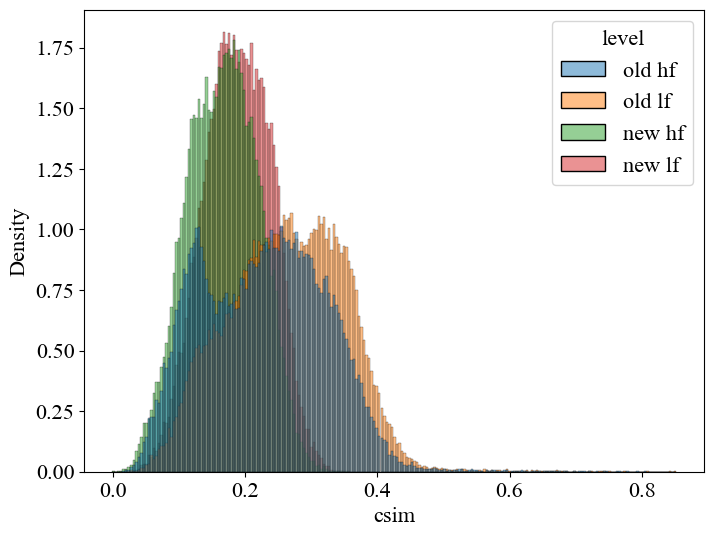

In [16]:
# plot the csim distribution
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
sns.histplot(df_simu, x="csim", hue="level", alpha=0.5, ax=ax, stat="density")
plt.show()

In [17]:
# check the csim of each group
df_tmp = df_simu.groupby(["old", "quantile"]).csim.mean().to_frame().reset_index()
df_tmp = pd.pivot_table(data=df_tmp, values="csim", columns="old", index="quantile").reset_index()
df_tmp["True-False"] = df_tmp[True] - df_tmp[False]
df_tmp["c_vec"] = df.groupby("quantile").c_vec.mean()
df_tmp

old,quantile,False,True,True-False,c_vec
0,0,0.192319,0.269846,0.077527,0.219993
1,1,0.198052,0.275851,0.077799,0.227657
2,2,0.189037,0.263070,0.074033,0.216477
3,3,0.182624,0.256032,0.073409,0.209257
4,4,0.182393,0.252116,0.069723,0.208362
5,5,0.176291,0.243061,0.066770,0.201411
6,6,0.173980,0.237721,0.063741,0.197805
7,7,0.167269,0.229226,0.061957,0.189770
8,8,0.158562,0.215687,0.057125,0.178927
9,9,0.156623,0.212968,0.056345,0.179112


### Yes Rate

In [18]:
# session-wise, get yes rate for each condition
df_sess_q = df_simu.groupby(["session", "quantile", "old"]).s_resp.mean().to_frame(name="yes_rate").reset_index()
df_sess_q

,session,quantile,old,yes_rate
0,0,0,False,0.111111
1,0,0,True,1.000000
2,0,1,False,0.153846
3,0,1,True,0.909091
4,0,2,False,0.000000
...,...,...,...,...
19995,999,7,True,0.727273
19996,999,8,False,0.250000
19997,999,8,True,0.818182
19998,999,9,False,0.400000


In [19]:
# collapse across session
df_q = df_sess_q.groupby(["quantile", "old"]).yes_rate.mean().to_frame().reset_index()
df_q

,quantile,old,yes_rate
0,0,False,0.105896
1,0,True,0.894488
2,1,False,0.115566
3,1,True,0.872784
4,2,False,0.135339
5,2,True,0.877652
6,3,False,0.119849
7,3,True,0.880113
8,4,False,0.147324
9,4,True,0.886353


In [20]:
# format df for plotting
df_plot = pd.pivot_table(df_q, values="yes_rate", index="quantile", columns="old").reset_index()
df_plot.rename(columns={False: "far", True: "hr"}, inplace=True)
df_plot["freq_mean"] = freq_mean
df_plot

old,quantile,far,hr,freq_mean
0,0,0.105896,0.894488,21.0
1,1,0.115566,0.872784,51.0
2,2,0.135339,0.877652,90.0
3,3,0.119849,0.880113,141.0
4,4,0.147324,0.886353,196.0
5,5,0.158796,0.868985,284.0
6,6,0.153668,0.848586,415.0
7,7,0.172855,0.867482,632.0
8,8,0.225593,0.849741,1163.0
9,9,0.192333,0.836906,4332.0


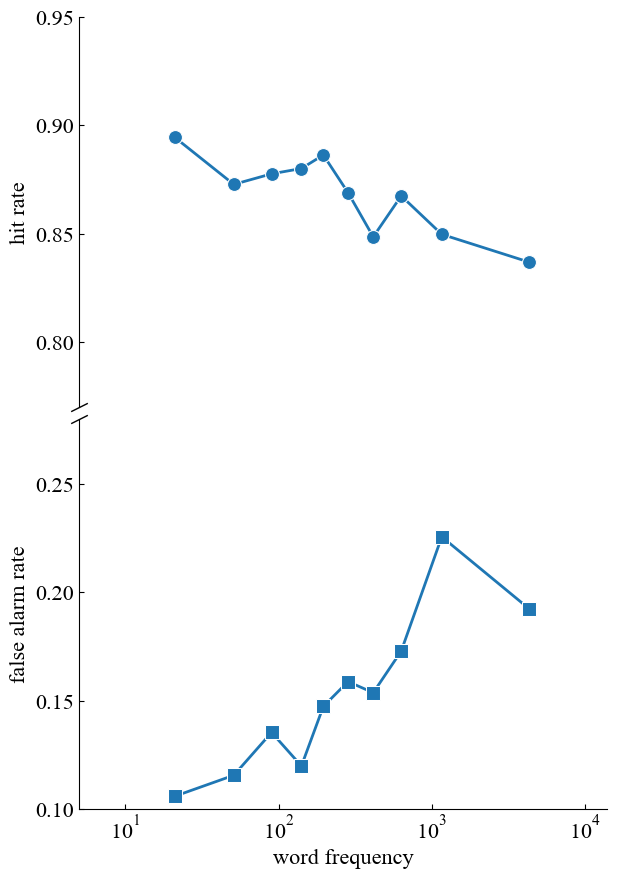

In [21]:
# plot
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(6, 9))
fig.subplots_adjust(left=0.1, right=0.98, bottom=0.1, top=0.98)
fig.subplots_adjust(hspace=0.03)

sns.lineplot(data=df_plot, y="hr", x="freq_mean", ax=ax1, marker="o", color="C0", markersize=10, linewidth=2)
sns.lineplot(data=df_plot, y="far", x="freq_mean", ax=ax2, marker="s", color="C0", markersize=10, linewidth=2)

ax1.set_ylim(0.77, 0.95)
ax1.set_yticks(np.arange(0.80, 0.96, 0.05))
ax2.set_ylim(0.1, 0.28)
ax2.set_yticks(np.arange(0.1, 0.30, 0.05))
ax1.tick_params(axis="y", direction="in")
ax1.tick_params(axis="x", direction="in")
ax2.tick_params(axis="y", direction="in")
ax2.tick_params(axis="x", direction="in")
plt.xscale("log")
plt.xlim(5, 14000)

ax1.spines.bottom.set_visible(False)
ax1.spines.top.set_visible(False)
ax2.spines.top.set_visible(False)
ax1.spines.right.set_visible(False)
ax2.spines.right.set_visible(False)
ax1.tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=False, labeltop=False)
ax2.minorticks_off()

d = 0.5  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12, linestyle="none", color="k", mec="k", mew=1, clip_on=False)
ax1.plot(0, 0, transform=ax1.transAxes, **kwargs)
ax2.plot(0, 1, transform=ax2.transAxes, **kwargs)

ax1.set_ylabel("hit rate")
ax2.set_ylabel("false alarm rate")
ax2.set_xlabel("word frequency")

# plt.tight_layout(h_pad = 0)
if SAVEFIG:
    ax1.set_ylabel(None)
    ax1.set_xlabel(None)
    ax2.set_ylabel(None)
    ax2.set_xlabel(None)
    ax1.tick_params(labelleft=False)
    ax2.tick_params(labelleft=False)
    plt.savefig("simu4_fig/simu4_WFE.pdf")
plt.show()

### Error Check

In [22]:
# Get behavioral stats and compare with ground truth
hr = df_plot.hr.to_numpy()
far = df_plot.far.to_numpy()
hr_gt = np.array([0.903, 0.885, 0.888, 0.880, 0.879, 0.880, 0.870, 0.862, 0.842, 0.837])
far_gt = np.array([0.114, 0.132, 0.143, 0.164, 0.171, 0.183, 0.187, 0.193, 0.192, 0.193])
err = np.mean(np.power(hr - hr_gt, 2)) + np.mean(np.power(far - far_gt, 2))
err

0.0007188727276388851